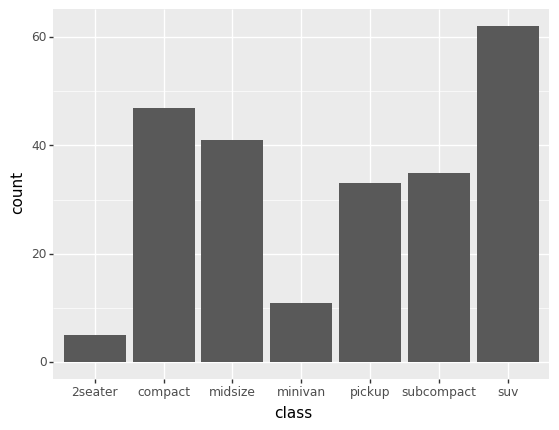

<ggplot: (-9223371916699735008)>

In [3]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

(ggplot(mpg)         # defining what data to use
 + aes(x='class')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

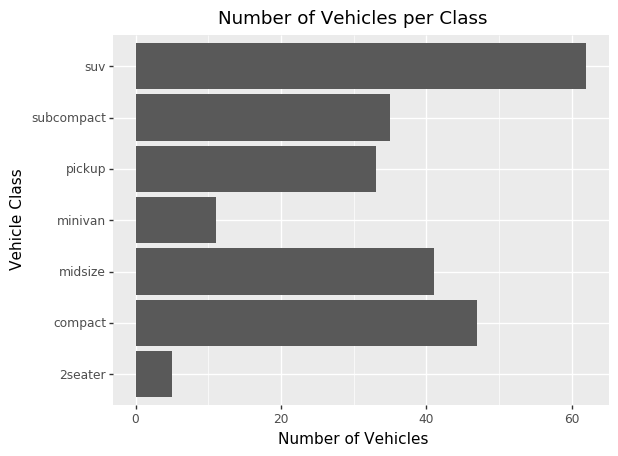

<ggplot: (-9223371916699696096)>

In [4]:
(ggplot(mpg)
 + aes(x='class')
 + geom_bar(size=20)
 + coord_flip()        # flipping the x- and y-axes
 + labs(title='Number of Vehicles per Class', x='Vehicle Class', y='Number of Vehicles') # customizing labels
)

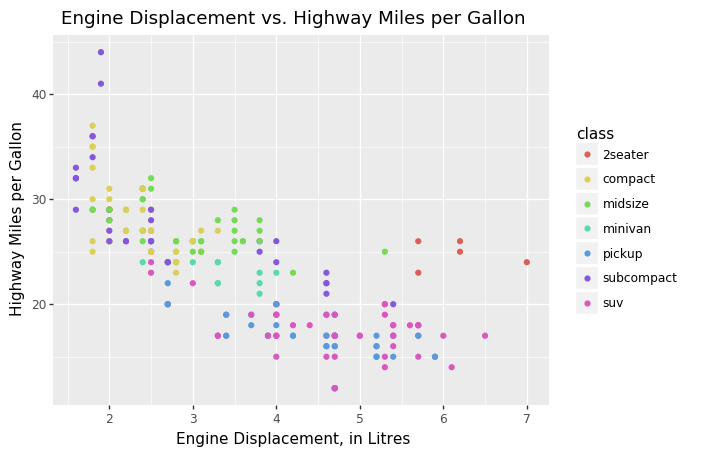

<ggplot: (-9223371916699473527)>

In [5]:
(ggplot(mpg)
 + aes(x='displ', y='hwy', color='class')
 + geom_point()
 + labs(title='Engine Displacement vs. Highway Miles per Gallon', x='Engine Displacement, in Litres', y='Highway Miles per Gallon')
)
## color can be replaced with shape, alpha, size.

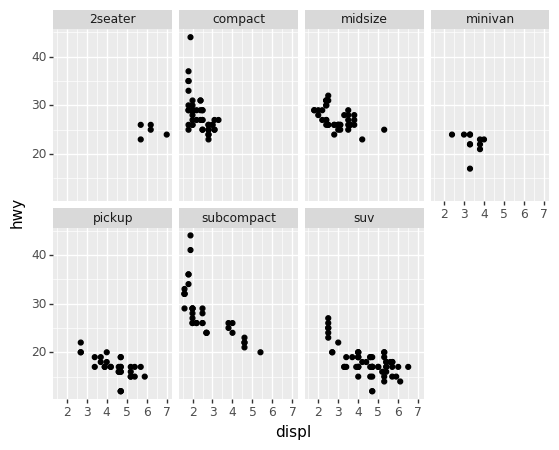

<ggplot: (120148860301)>

In [6]:
(ggplot(data = mpg) + 
  geom_point(mapping = aes(x = 'displ', y = 'hwy')) + 
  facet_wrap("class", nrow = 2))

C:\Users\Leo\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


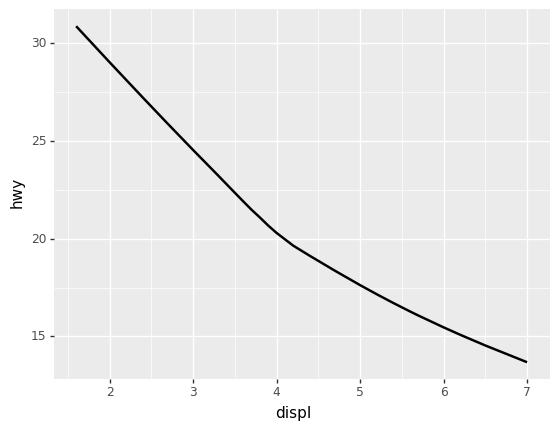

<ggplot: (120155895770)>

In [7]:
# left
(ggplot(data = mpg) + 
  geom_point(mapping = aes(x = 'displ', y = 'hwy')))

# right
(ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = 'displ', y = 'hwy')))

# Visualizing Errors

Basic Errorbars

<ErrorbarContainer object of 3 artists>

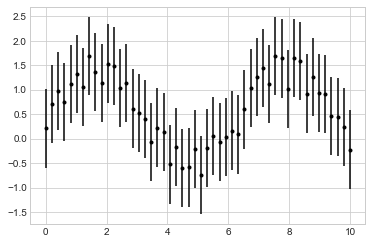

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
x = np.linspace(0,10,50)
dy=0.8
y = np.sin(x)+dy*np.random.rand(50)

plt.errorbar(x,y,yerr=dy,fmt='.k')

Continuous Errors

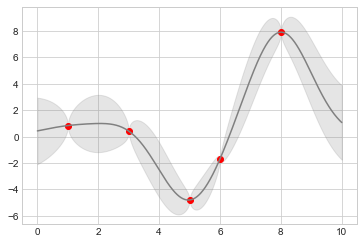

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor as GP

model=lambda x: x * np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata=model(xdata)

gp=GP()
gp.fit(xdata[:, np.newaxis], ydata)

xfit=np.linspace(0,10,1000)
yfit, sigma= gp.predict(xfit[:, np.newaxis],return_std=True)
dyfit = 2*np.sqrt(sigma*2)
plt.plot(xdata,ydata,'or')
plt.plot(xfit, yfit, '-',color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                color = 'gray', alpha=0.2)

# Density and Contour Plots

In [10]:
plt.style.use('seaborn')
def f(x,y):
    return np.sin(x)**10+np.cos(10+x+y)*np.cos(x)
x=np.linspace(0,5,50)
y=np.linspace(0,5,40)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)

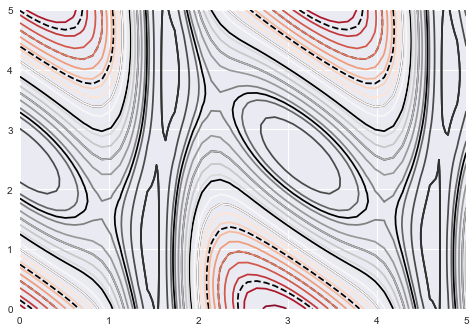

In [11]:
plt.contour(X,Y,Z,colors='black')
plt.contour(X,Y,Z,20,cmap='RdGy')

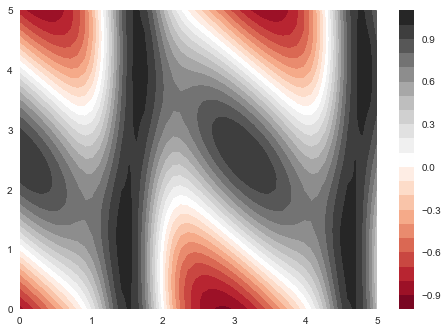

In [12]:
plt.contourf(X,Y,Z,20,cmap='RdGy')
plt.colorbar();

# Histograms, Binnings and Density

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


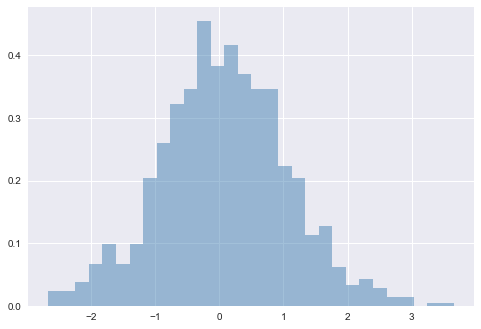

In [13]:
data = np.random.randn(1000)
plt.hist(data, bins=30, normed=True, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


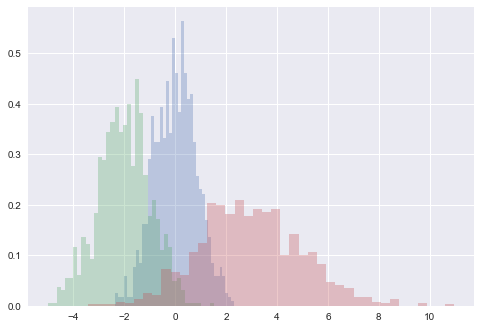

In [14]:
x1=np.random.normal(0,0.8,1000)
x2=np.random.normal(-2,1,1000)
x3=np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

_=plt.hist(x1, **kwargs)
_=plt.hist(x2, **kwargs)
_=plt.hist(x3, **kwargs);

In [15]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 67 356 440 123  14]


Two-Dimensional Histograms and Binnings

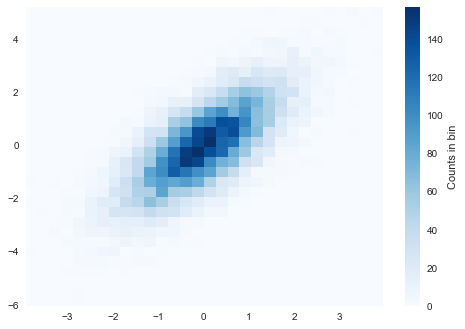

In [16]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,10000).T
plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in bin')

# Customizing Plot Legends

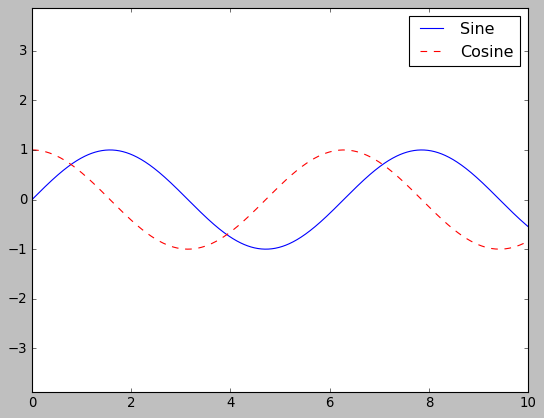

In [17]:
plt.style.use('classic')
x=np.linspace(0,10,1000)
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),'-b',label='Sine')
ax.plot(x,np.cos(x),'--r',label='Cosine')
ax.axis('equal')
leg=ax.legend();

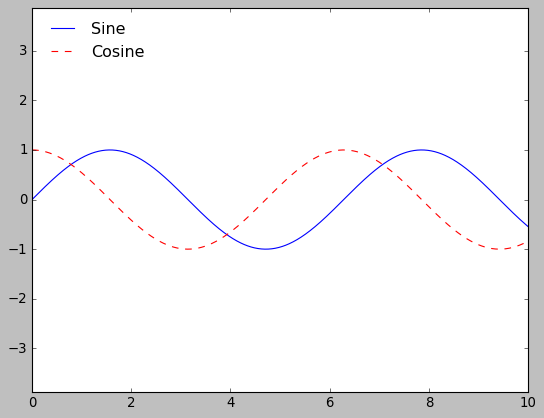

In [18]:
ax.legend(loc='upper left', frameon=False)
fig

Choosing Elements for the Legend

Legend for Size of Points

In [19]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

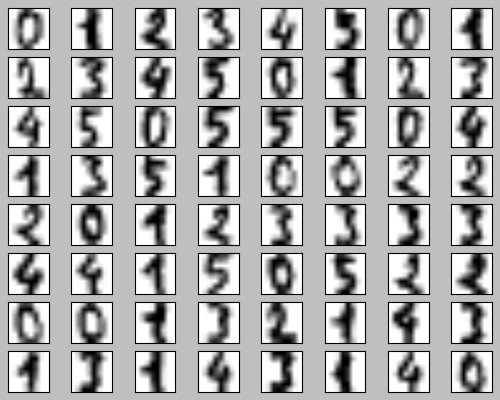

In [20]:
fig, ax = plt.subplots(8,8)
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap='binary')
    axi.set(xticks=[],yticks=[])

In [21]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

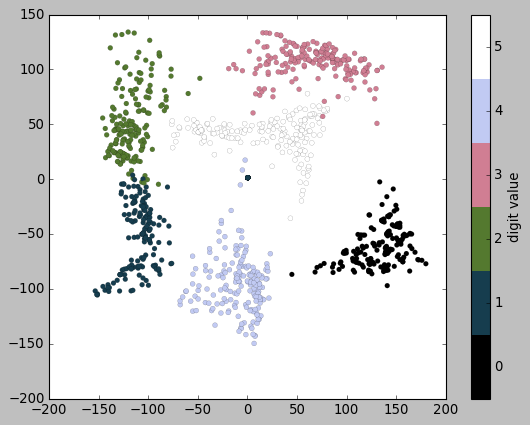

In [22]:
plt.scatter(projection[:,0],projection[:,1],lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix',6))
plt.colorbar(ticks=range(6),label='digit value')
plt.clim(-0.5,5.5)

# Multiple Subplots

plt.axes: Suplots by Hand

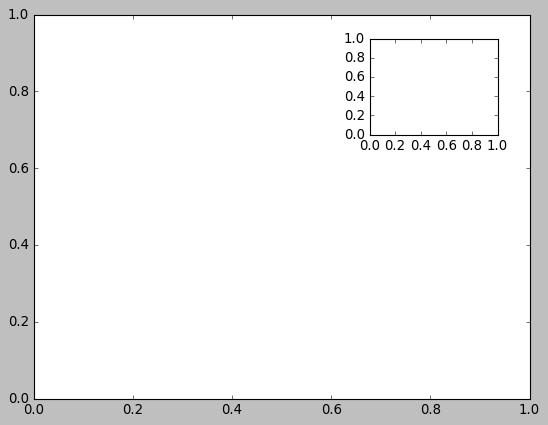

In [23]:
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.65,0.2,0.2])
# 65% of the width and 65% of the height; the size of the axes is 20% of the width and 20% of the height of the figure

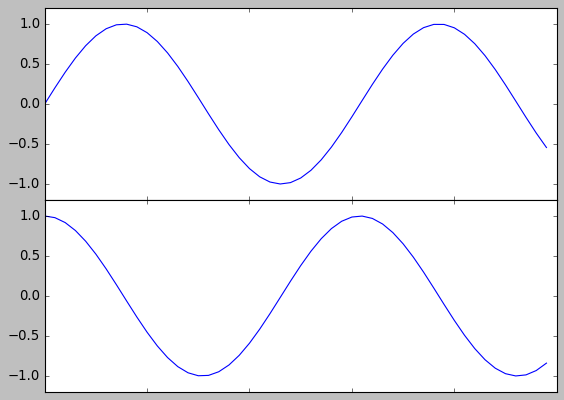

In [24]:
fig = plt.figure()
ax1=fig.add_axes([0.1, 0.5, 0.8, 0.4],
                xticklabels=[], ylim=(-1.2,1.2))
ax2=fig.add_axes([0.1, 0.1, 0.8, 0.4],
                xticklabels=[], ylim=(-1.2,1.2))
x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

plt.subplot: Simple Grids of Subplots

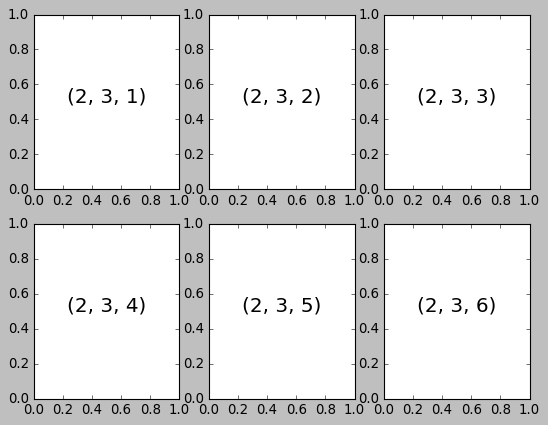

In [25]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),
    fontsize=18, ha='center')

# Three-Dimensional Plotting in Matplotlib

In [26]:
from mpl_toolkits import mplot3d

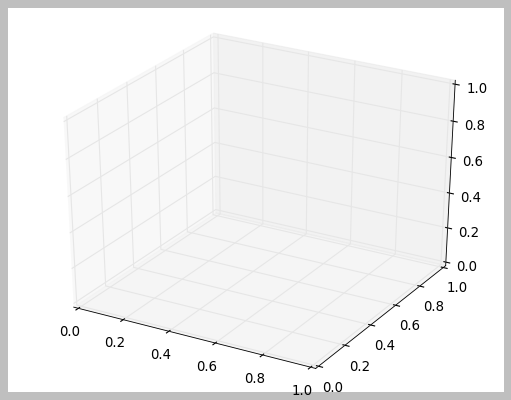

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Three-Dimesional Points and Lines

In [28]:
zline=np.linspace(0,15,1000)
xline=np.sin(zline)
yline=np.cos(zline)
ax.plot3D(xline,yline,zline,'gray')


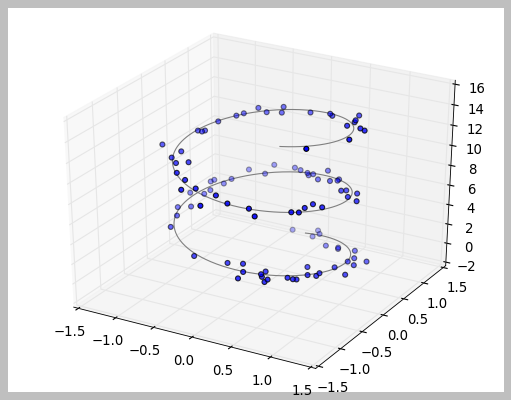

In [29]:
zdata=15*np.random.random(100)
xdata=np.sin(zdata)+0.1*np.random.randn(100)
ydata=np.cos(zdata)+0.1*np.random.randn(100)
ax.scatter3D(xdata,ydata,zdata,cmap='Greens')
fig

# Three-Dimensional Contour Plots

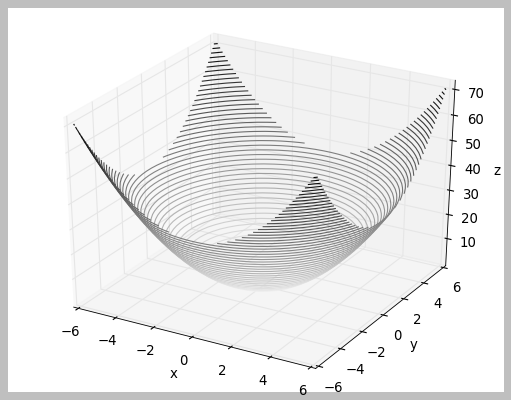

In [30]:
import numpy as np
def f(x,y):
    return x ** 2 + y ** 2
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)

X,Y=np.meshgrid(x,y)
Z=f(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

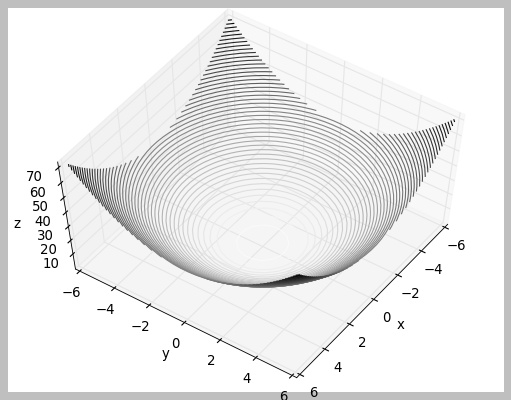

In [31]:
ax.view_init(60,35)
fig

Wireframes and Surface Plots

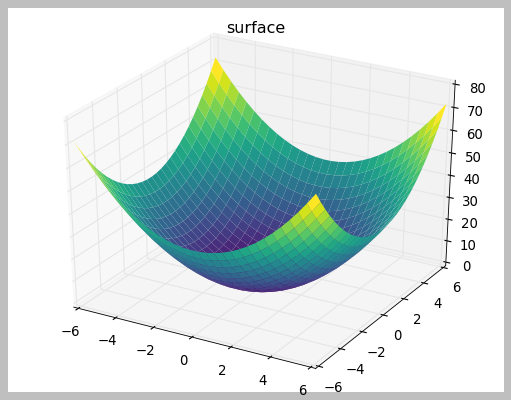

In [32]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='viridis',edgecolor='none')
ax.set_title('surface');

# Map Projections

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


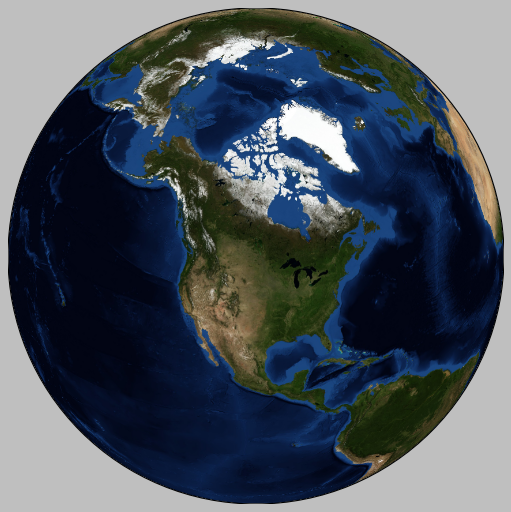

In [33]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(8,8))
m=Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


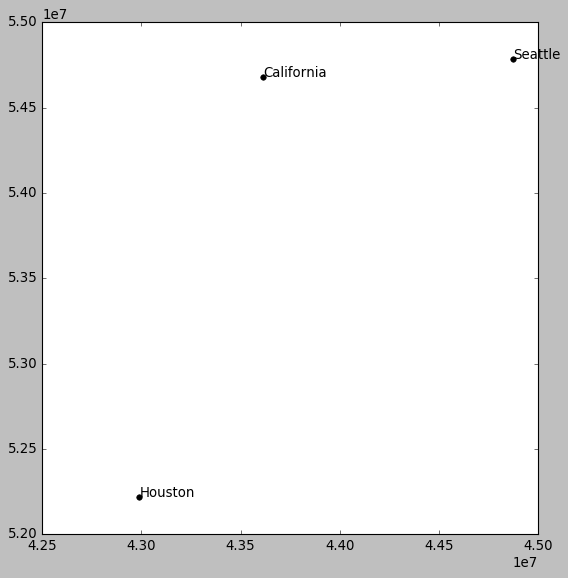

In [75]:
fig = plt.figure(figsize=(8,8))
m=Basemap(projection='lcc',resolution='h',
         width=1E8,height=1E8,
         lat_0=57.3,lon_0=-6.2,)
#m.etopo(scale=0.5,alpha=0.5)

# Map (long, lat) to (x,y) for plotting
x,y = m(-122.3,47.6)
plt.plot(x,y,'ok',markersize=5)
plt.text(x,y,'Seattle',fontsize=12);

x,y = m(-119.4,36.8)
plt.plot(x,y,'ok',markersize=5)
plt.text(x,y,'California',fontsize=12);

x,y = m(-95.4,29.8)
plt.plot(x,y,'ok',markersize=5)
plt.text(x,y,'Houston',fontsize=12);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


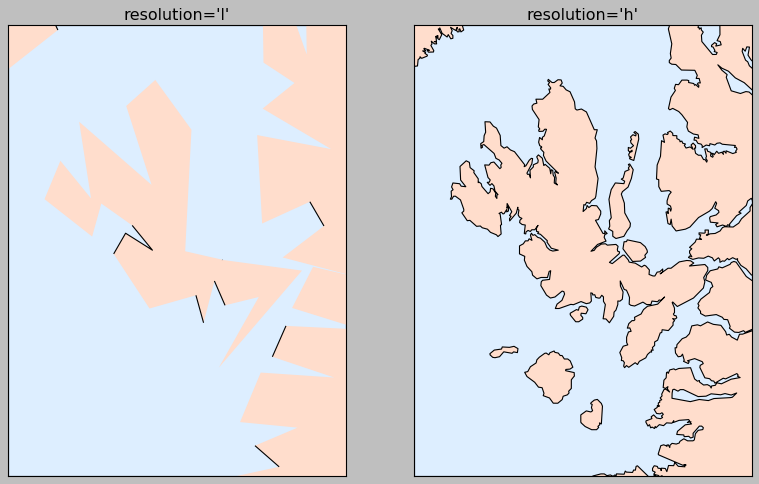

In [73]:
fig,ax=plt.subplots(1,2,figsize=(12,8))

for i,res in enumerate(['l','h']):
    m=Basemap(projection='gnom',lat_0=57.3,lon_0=-6.2,
             width=90000,height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC",lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res))

In [35]:
from itertools import chain

def draw_map(m,scale=0.2):
    m.shadedrelief(scale=scale)

    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180,180,13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines,lon_lines)

    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-',alpha=0.3,color='w')

Cylindrical projections

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


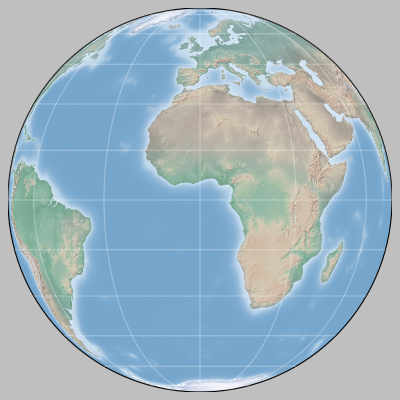

In [36]:

fig = plt.figure(figsize=(8,6),edgecolor='w')
map = Basemap(projection='ortho',
lat_0=0, lon_0=0)
draw_map(map)

Cylindrical projections

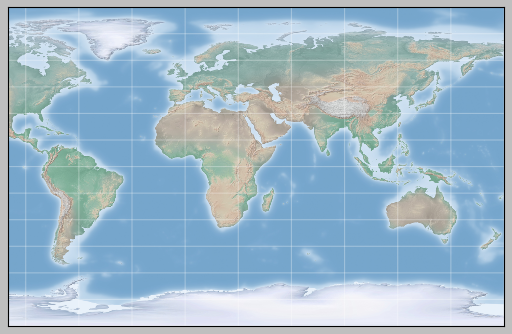

In [37]:
fig = plt.figure(figsize=(8,6),edgecolor='w')
m = Basemap(projection='cyl',resolution=None,
           llcrnrlat=-90, urcrnrlat=90,
           llcrnrlon=-100, urcrnrlon=180, )
draw_map(m)

Pseudo-cyclindrical projections

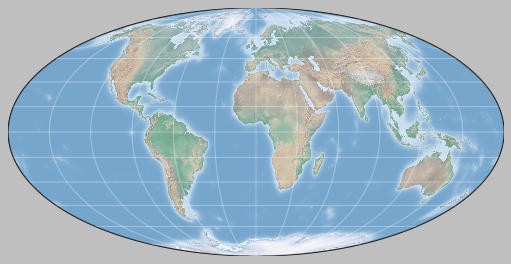

In [38]:
fig = plt.figure(figsize=(8,6),edgecolor='w')
m = Basemap(projection='moll', resolution=None,
           lat_0=0, lon_0=0)
draw_map(m)

In [39]:
cities=pd.read_csv("california_cities.csv")
cities.head()

city       latd       longd  elevation_m  elevation_ft  \
0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2      Alameda  37.756111 -122.274444          NaN          33.0   
3       Albany  37.886944 -122.297778          NaN          43.0   
4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  
1          20.260         20.184           0.076                0.37  
2          59.465         27.482          31.983               53.79  
3          14.155          4.632           9.524               67.28  
4          19.766         19.763           0.003                0.01

In [40]:
lat=cities['latd'].values
lon=cities['longd'].values
population=cities['population_total'].values
area=cities['area_total_km2'].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


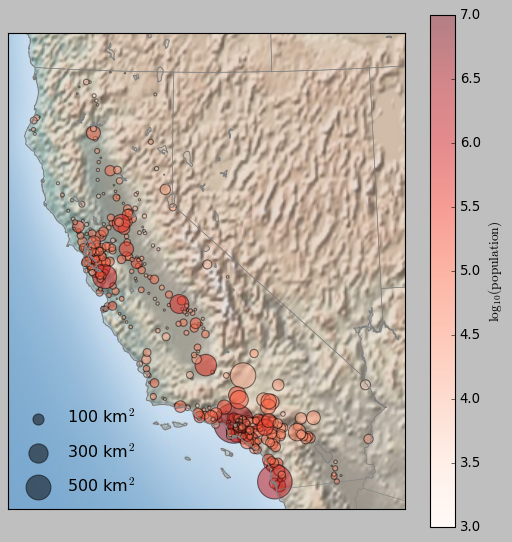

In [41]:
# 1. Draw the map background
fig=plt.figure(figsize=(8,8))
m=Basemap(projection='lcc',resolution='h',
         lat_0=37.5,lon_0=-119,
         width= 1.0E6,height=1.2E6)
#lon_0/lat_0: centre of desired map domain
#width/height: width/height of desired map domain in projection
#coordinates(meters)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size relecting area
m.scatter(lon,lat,latlon=True,
         c=np.log10(population),s=area,cmap='Reds',alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3,7)

# make legend with dummy points
for a in [100,300,500]:
    plt.scatter([],[],c='k',alpha=0.5,s=a,
               label=str(a)+' km$^2$')
plt.legend(scatterpoints=1,frameon=False,
          labelspacing=1,loc='lower left');

# Plotting with Seaborn

Histograms, KDE, and densities

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


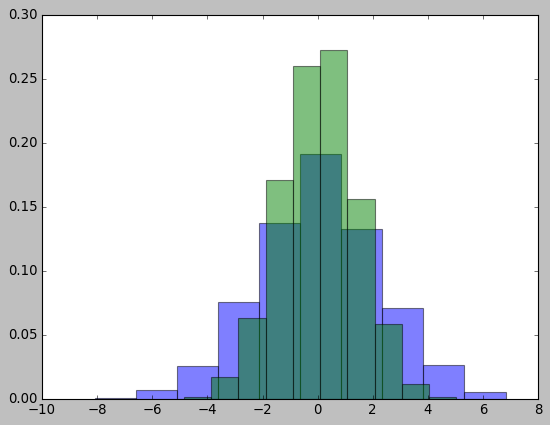

In [42]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data = pd.DataFrame(data,columns=['x','y'])

for col in 'xy':
    plt.hist(data[col],normed=True,alpha=0.5)

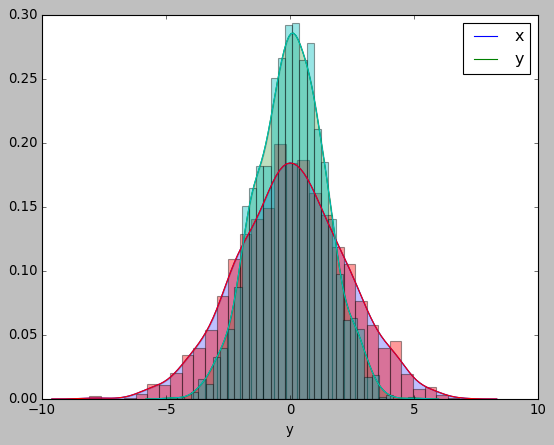

In [43]:
import seaborn as sns
for col in 'xy':
    sns.kdeplot(data[col],shade=True)
# kernel density estimates for visualizing distributions
sns.distplot(data['x'])
sns.distplot(data['y']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


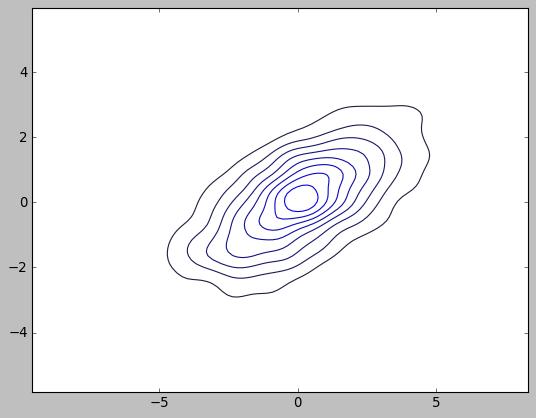

In [44]:
#two-dimensional data to kdeplot
sns.kdeplot(data);

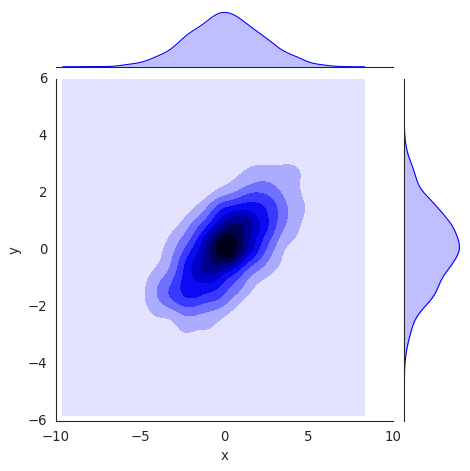

In [45]:
with sns.axes_style('white'):
    sns.jointplot("x","y",data,kind='kde')
# see the joint distribution and the marginal distribution tgt using jointplot

Pair plots

In [46]:
iris=sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


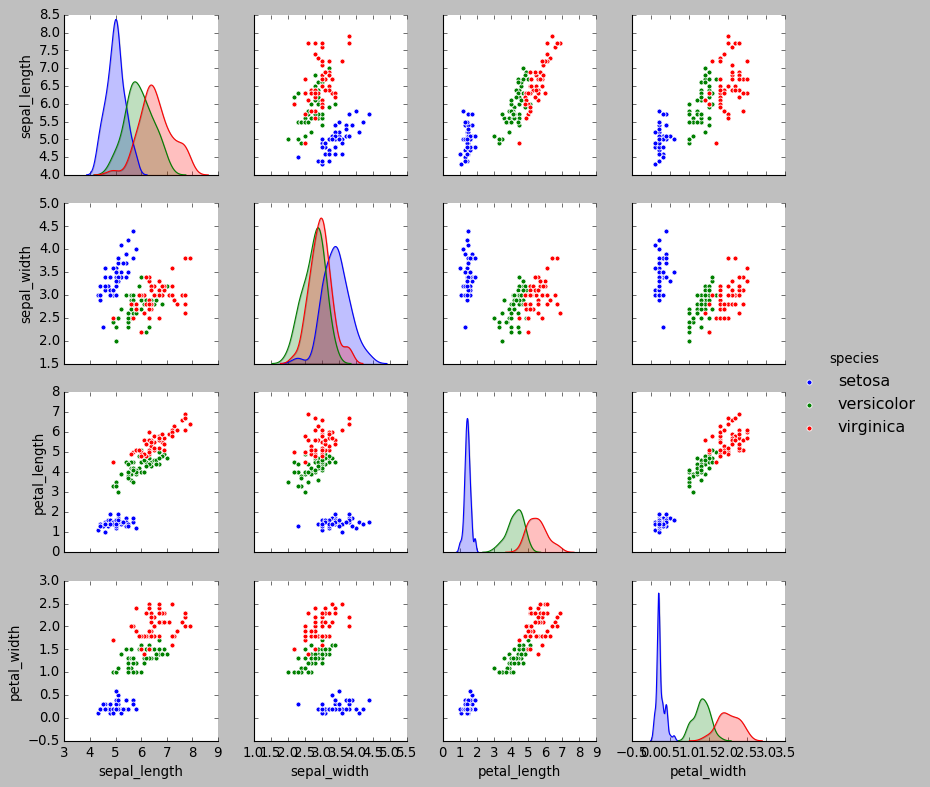

In [47]:
sns.pairplot(iris,size=2.5,hue='species')
# adding hue='species' add color to classify

Faceted histograms

In [48]:
tips=sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

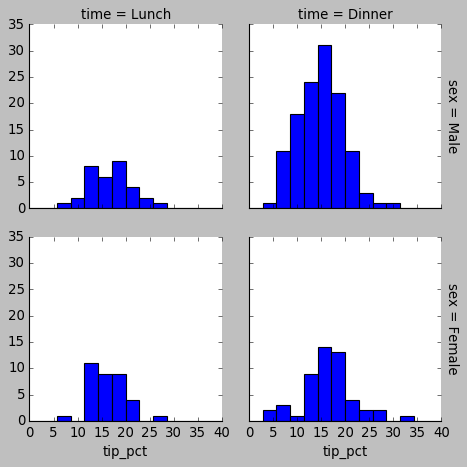

In [49]:
tips['tip_pct']=100*tips['tip']/tips['total_bill']
grid=sns.FacetGrid(tips,row="sex",col="time",margin_titles=True)
grid.map(plt.hist,"tip_pct",bins=np.linspace(0,40,15));

Factor plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


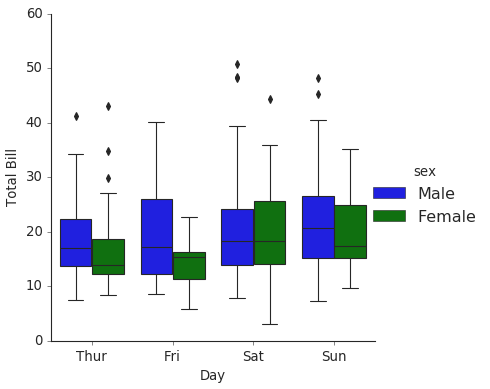

In [50]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day","total_bill","sex",data=tips,
                     kind="box")
    g.set_axis_labels("Day", "Total Bill");

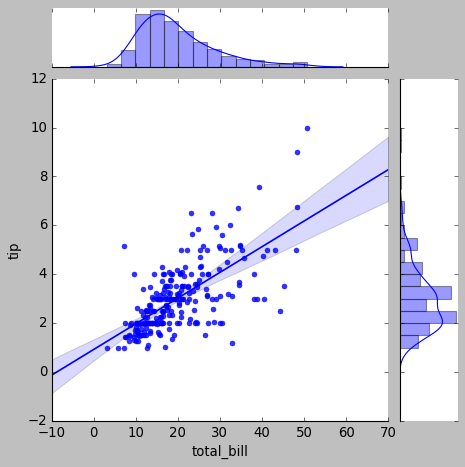

In [51]:
sns.jointplot("total_bill","tip",data=tips,kind='reg')

Bar plots

In [52]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


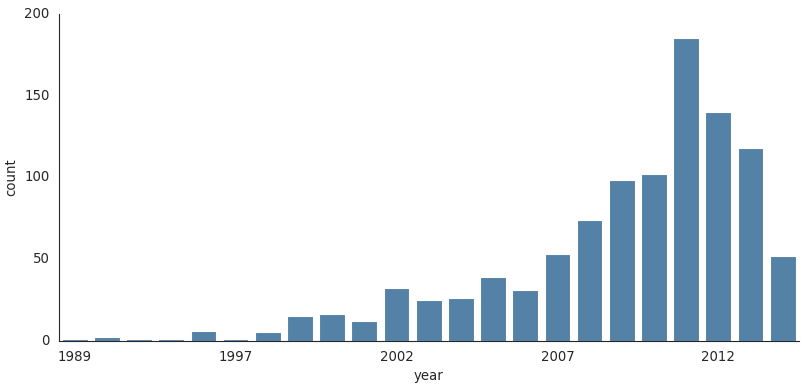

In [53]:
with sns.axes_style('white'):
    g = sns.factorplot("year",data=planets, aspect=2,
                      kind="count",color='steelblue')
    g.set_xticklabels(step=5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


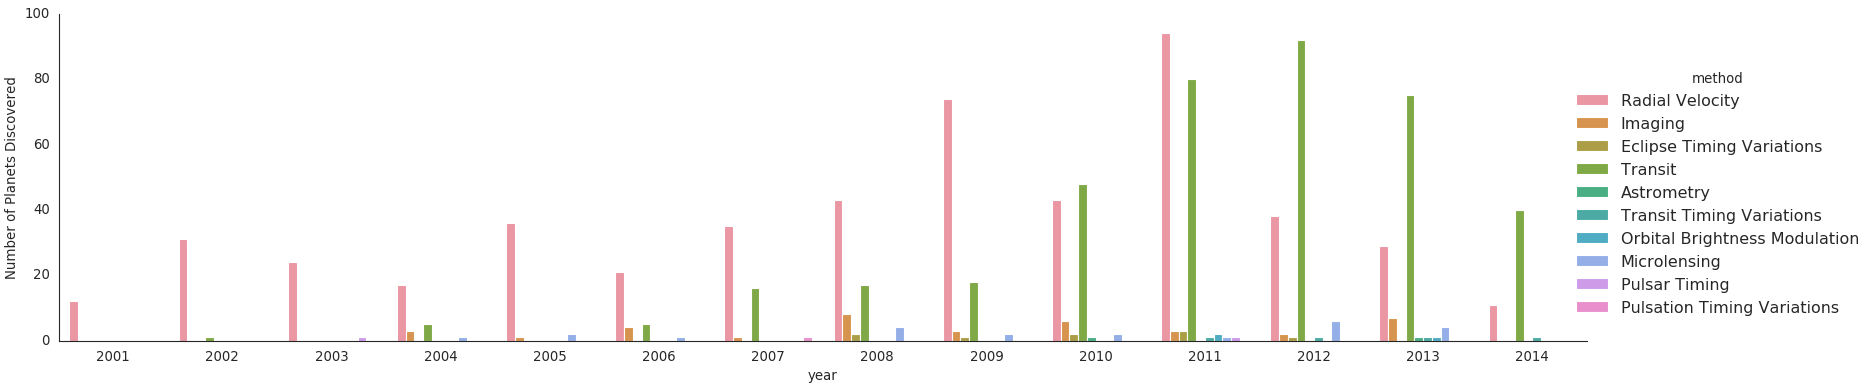

In [54]:
with sns.axes_style('white'):
    g = sns.factorplot("year",data=planets,aspect=4.0,kind='count',
                      hue='method',order=range(2001,2015))
    g.set_ylabels('Number of Planets Discovered')

In [55]:
from sklearn.datasets import load_boston
boston = load_boston(return_X_y=False)
print(boston.data)
print(boston.target)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [56]:
housedata=boston.data
housetarget=boston.target

In [57]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
housedata=pd.DataFrame(housedata,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                                       'DIS','RAD','TAX','PTRATIO','B','LSTAT'])
housedata['MEDV']=housetarget

In [59]:
housedata.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [60]:
housedata_n=(housedata-np.mean(housedata,axis=0))/np.std(housedata,axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


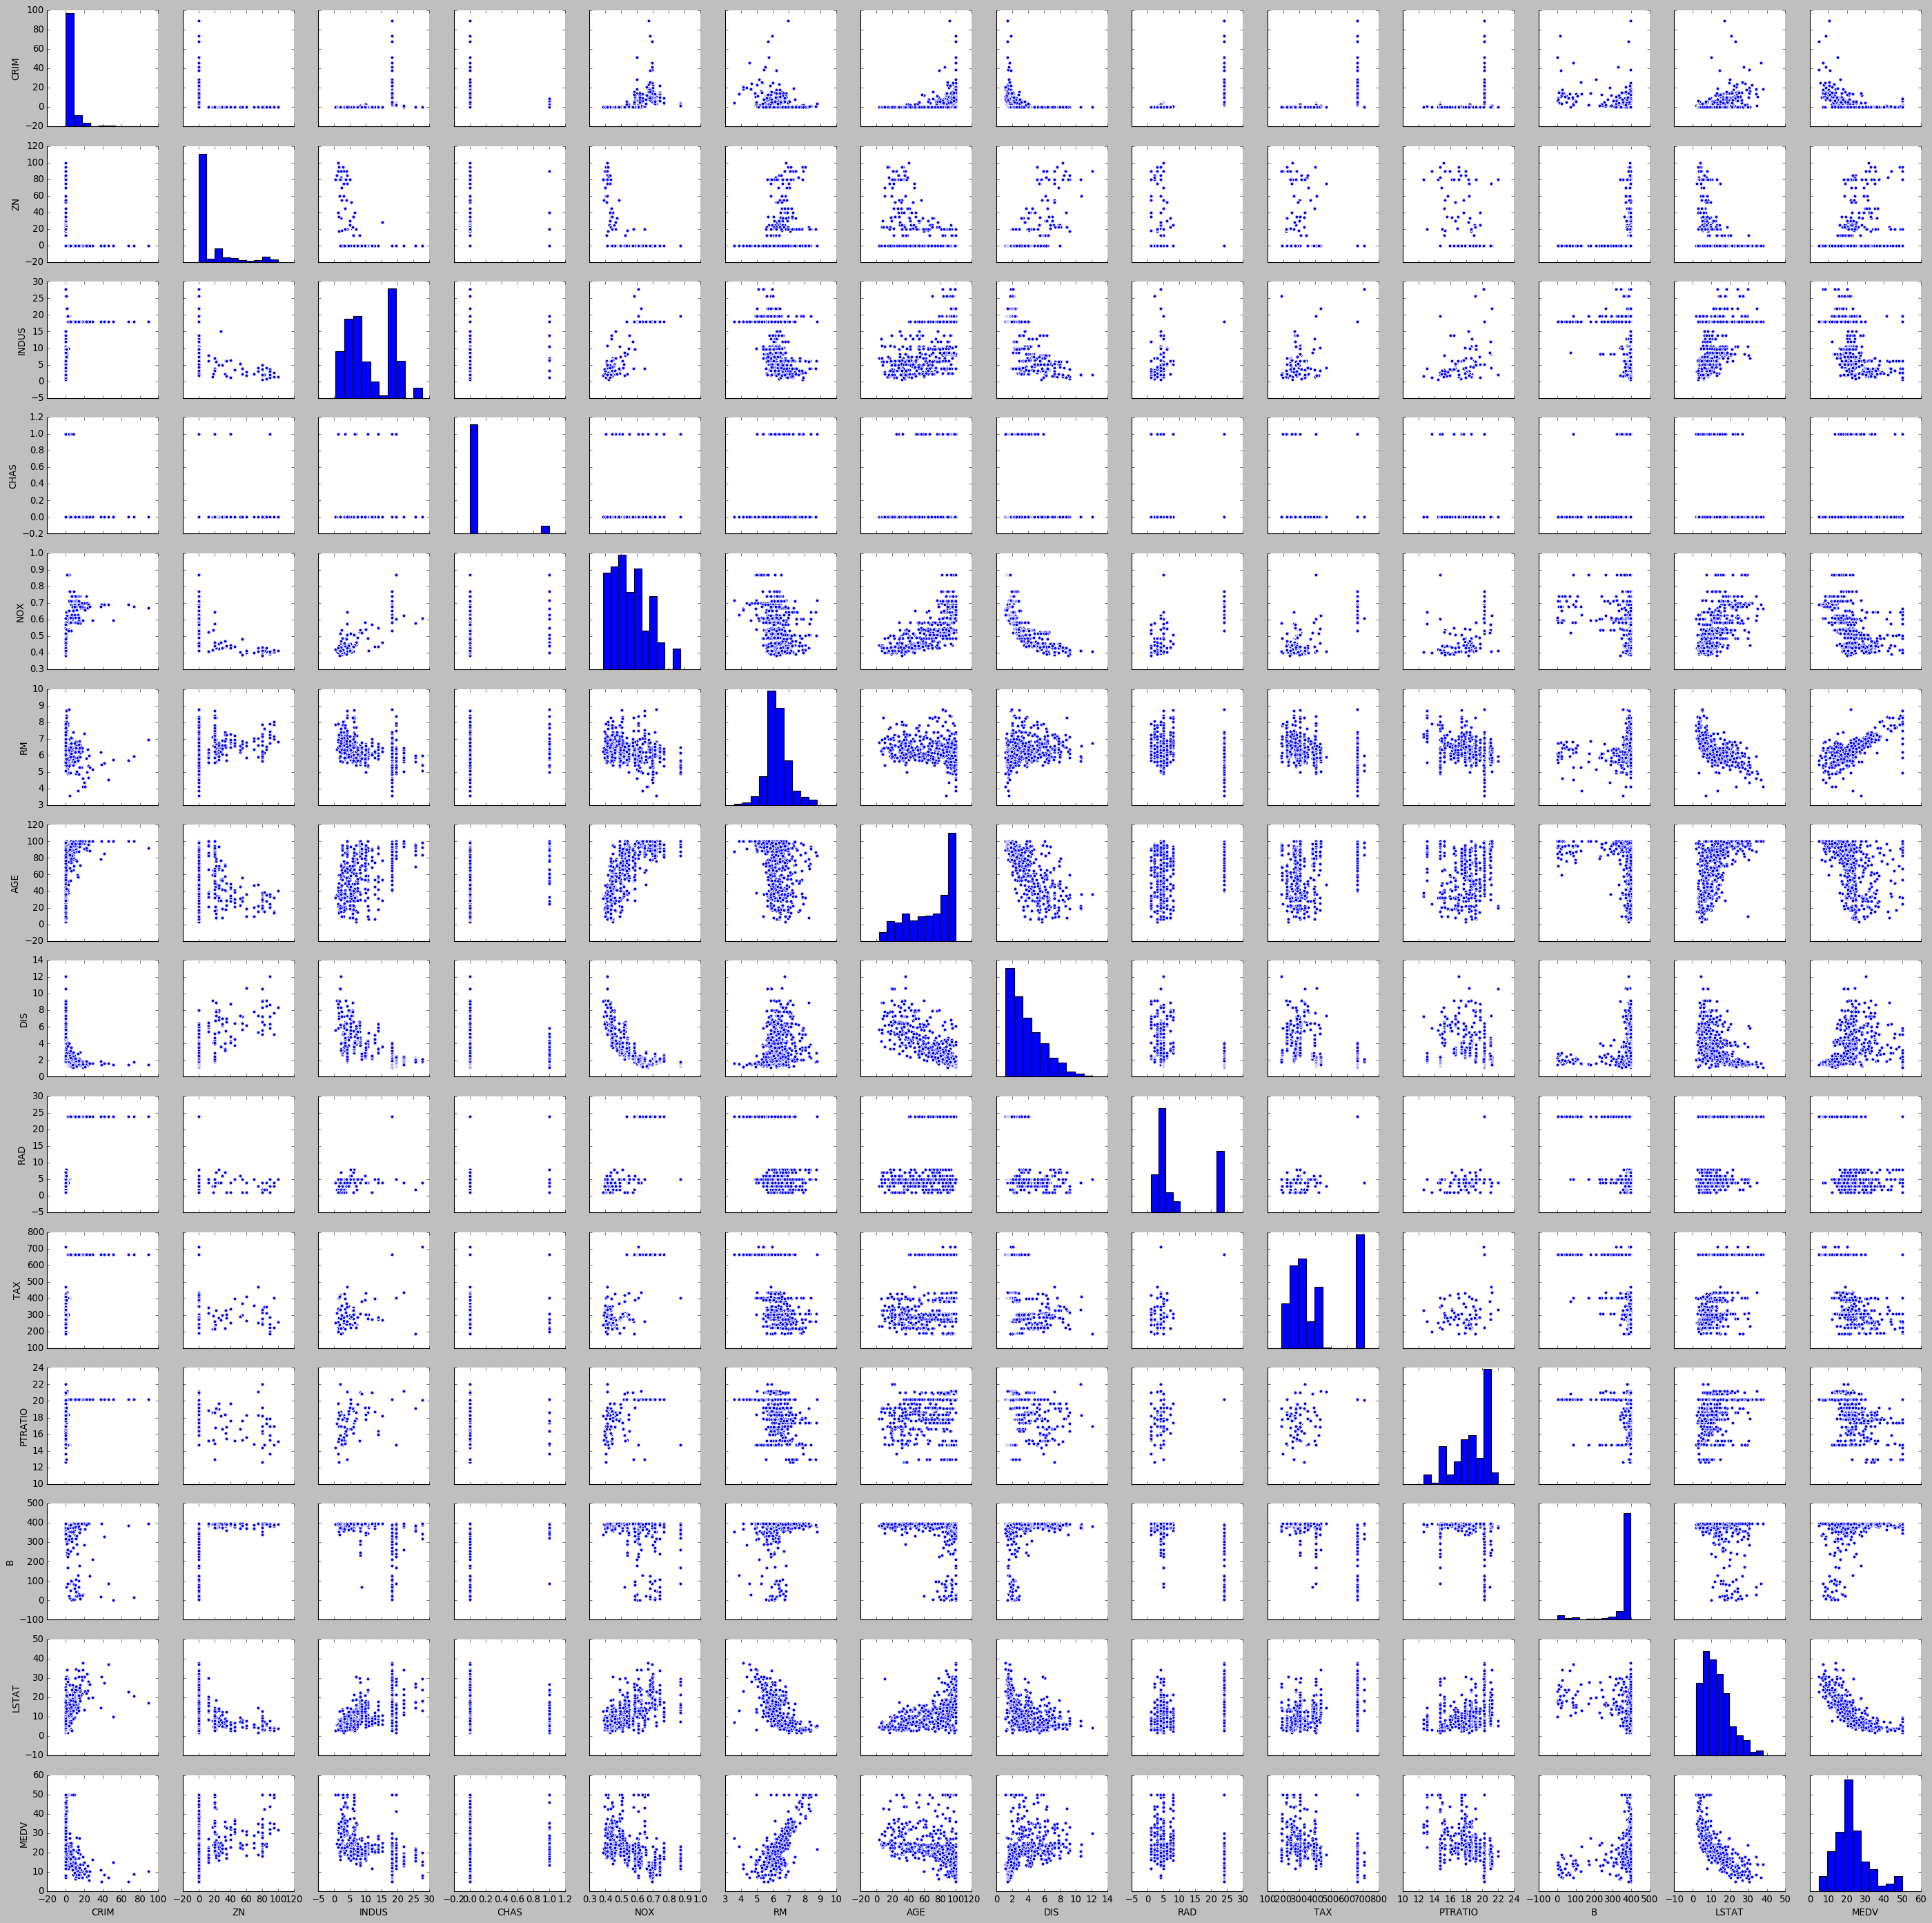

In [61]:
sns.pairplot(housedata,size=2.5)

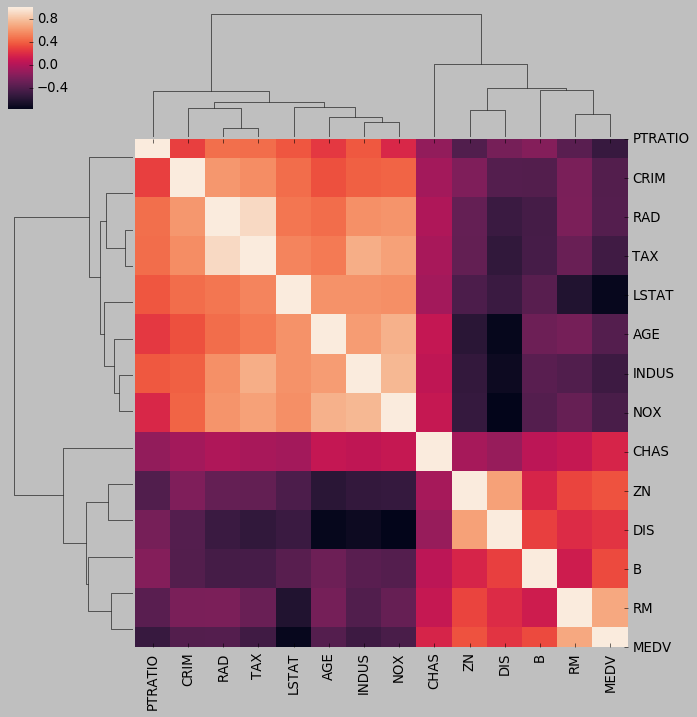

In [62]:
corr=pd.DataFrame(np.corrcoef(housedata.T),index=housedata.columns,columns=housedata.columns)
g = sns.clustermap(corr)

In [63]:
import statsmodels.api as sm
X = sm.add_constant(housedata.iloc[:,0:13])
Y = housedata.iloc[:,13]
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        15:44:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
housedata.shape[1]

14